# Notebook to manipulate data before training

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
import zipfile
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [70]:
path = Path('/storage')
path.ls()

path_lbl = path/'vocal_chords_and_rings_data/data/labels'
path_img = path/'vocal_chords_and_rings_data/data/images'
path_lbl = path_lbl.resolve()
path_img = path_img.resolve()

In [6]:
zip_ref = zipfile.ZipFile('/storage/vocal_chords_and_rings_data/export-20190606.zip', 'r')
zip_ref.extractall('/storage/vocal_chords_and_rings_data/')
zip_ref.close()

In [8]:
! mkdir -p /storage/vocal_chords_and_rings_data/data/images2
! mkdir -p /storage/vocal_chords_and_rings_data/data/labels2

! mv -v /storage/vocal_chords_and_rings_data/export-06062019/export/validation/labels/* /storage/vocal_chords_and_rings_data/data/labels2
! mv -v /storage/vocal_chords_and_rings_data/export-06062019/export/train/labels/* /storage/vocal_chords_and_rings_data/data/labels2
! mv -v /storage/vocal_chords_and_rings_data/export-06062019/export/test/labels/* /storage/vocal_chords_and_rings_data/data/labels2

! mv -v /storage/vocal_chords_and_rings_data/export-06062019/export/validation/images/* /storage/vocal_chords_and_rings_data/data/images2
! mv -v /storage/vocal_chords_and_rings_data/export-06062019/export/train/images/* /storage/vocal_chords_and_rings_data/data/images2
! mv -v /storage/vocal_chords_and_rings_data/export-06062019/export/test/images/* /storage/vocal_chords_and_rings_data/data/images2

'/storage/vocal_chords_and_rings_data/export-06062019/export/validation/labels/aeac5d0b-0000000.png' -> '/storage/vocal_chords_and_rings_data/data/labels2/aeac5d0b-0000000.png'
'/storage/vocal_chords_and_rings_data/export-06062019/export/validation/labels/eca4ee98-0000000.png' -> '/storage/vocal_chords_and_rings_data/data/labels2/eca4ee98-0000000.png'
'/storage/vocal_chords_and_rings_data/export-06062019/export/validation/labels/fe4b658f-0000000.png' -> '/storage/vocal_chords_and_rings_data/data/labels2/fe4b658f-0000000.png'
'/storage/vocal_chords_and_rings_data/export-06062019/export/train/labels/07496dbb-0000000.png' -> '/storage/vocal_chords_and_rings_data/data/labels2/07496dbb-0000000.png'
'/storage/vocal_chords_and_rings_data/export-06062019/export/train/labels/3f02f0bc-0000000.png' -> '/storage/vocal_chords_and_rings_data/data/labels2/3f02f0bc-0000000.png'
'/storage/vocal_chords_and_rings_data/export-06062019/export/train/labels/4fefa1cb-0000000.png' -> '/storage/vocal_chords_and

In [12]:
#Convert all images to .png

for cvt_img in get_image_files(path_img):
    im = Image.open(cvt_img)
    print(str(cvt_img))
    im.save('{}.png'.format(str(cvt_img).split('.')[0]))
    
#Remove files with old extensions (*.jpeg, *.gif)
import os

for cvt_img in get_image_files(path_img):
    if str(cvt_img).split('.')[1] == 'gif':
        os.remove('{}.gif'.format(str(cvt_img).split('.')[0]))
    if str(cvt_img).split('.')[1] == 'jpeg':
        os.remove('{}.jpeg'.format(str(cvt_img).split('.')[0]))

/storage/vocal_chords_and_rings_data/data/images2/07496dbb-0000000.png
/storage/vocal_chords_and_rings_data/data/images2/eca4ee98-0000000.png
/storage/vocal_chords_and_rings_data/data/images2/b4342b53-0000000.png
/storage/vocal_chords_and_rings_data/data/images2/5c0f3681-0000000.png
/storage/vocal_chords_and_rings_data/data/images2/ad2b0eec-0000000.png
/storage/vocal_chords_and_rings_data/data/images2/fe4b658f-0000000.png
/storage/vocal_chords_and_rings_data/data/images2/95cc11e1-0000000.png
/storage/vocal_chords_and_rings_data/data/images2/9893aa71-0000000.png
/storage/vocal_chords_and_rings_data/data/images2/6b305c19-0000000.png
/storage/vocal_chords_and_rings_data/data/images2/b4846ea8-0000000.png
/storage/vocal_chords_and_rings_data/data/images2/a8dd5f25-0000000.png
/storage/vocal_chords_and_rings_data/data/images2/5f6e80bf-0000000.png
/storage/vocal_chords_and_rings_data/data/images2/4fefa1cb-0000000.png
/storage/vocal_chords_and_rings_data/data/images2/aeac5d0b-0000000.png
/stora

In [71]:
#Randomly create the valid and train .txt files
import random
percent_train = 0.85
complete_list = []
complete_list = [str(i).split('/')[-1] for i in get_image_files(path_img)]
random.shuffle(complete_list)

train_list = complete_list[0:int(len(complete_list)*percent_train)]
valid_list = complete_list[int(len(complete_list)*percent_train):]

with open('/storage/vocal_chords_and_rings_data/train.txt', 'w') as f:
    for img_name in train_list:
        f.write("%s\n" % str(img_name))
with open('/storage/vocal_chords_and_rings_data/valid.txt', 'w') as f:
    for img_name in valid_list:
        f.write("%s\n" % str(img_name))
        

(array([0, 2], dtype=uint8), (201, 251))

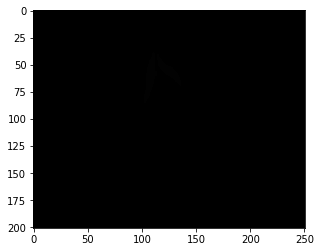

In [72]:
im = Image.open(get_image_files(path_lbl)[1])
plt.imshow(im)
np.unique(im),np.shape(im)
# print("VALUE: {}".format(np.array(im)[10][300]))

In [42]:
import cv2
count = [0,0,0,0]
if True:
    for cvt_img in get_image_files(path_lbl):
        i = cv2.imread(str(cvt_img),cv2.IMREAD_GRAYSCALE)
        print ("UNIQUE: {}".format(np.unique(i)))
#         i = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
        print(i.shape)
        for col in range(i.shape[1]):
            for row in range(i.shape[0]):
                if i[row][col] == 0:
                    count[0] +=1
                    i[row][col] = 0
                if i[row][col] == 29: #blue
                    count[2] +=1
                    i[row][col] = 2
                if i[row][col] == 76: #red
                    count[1] +=1
                    i[row][col] = 1
                if i[row][col] == 149:
                    count[3] +=1
                    i[row][col] = 3

        cv2.imwrite(str(cvt_img), i)
    

UNIQUE: [ 0 29]
(480, 720)
UNIQUE: [ 0 29]
(480, 720)
UNIQUE: [ 0 76]
(480, 720)
UNIQUE: [  0  76 149]
(480, 720)
UNIQUE: [ 0 29]
(480, 720)
UNIQUE: [  0  76 149]
(480, 720)
UNIQUE: [  0  76 149]
(480, 720)
UNIQUE: [  0  76 149]
(480, 720)
UNIQUE: [ 0 29]
(480, 720)
UNIQUE: [ 0 29]
(480, 720)
UNIQUE: [ 0 29]
(480, 720)
UNIQUE: [ 0 29]
(480, 720)
UNIQUE: [ 0 29]
(480, 720)
UNIQUE: [ 0 29]
(480, 720)
UNIQUE: [ 0 29]
(480, 720)
UNIQUE: [ 0 76]
(480, 720)
UNIQUE: [  0  76 149]
(480, 720)
UNIQUE: [ 0 29]
(480, 720)
UNIQUE: [  0  76 149]
(480, 720)


## Ensure no repeated names

In [65]:
list2 = [str(name2).split('/')[-1] for name2 in get_image_files(path_img)]
path_img1 = path_img/"../images"
list = [str(name).split('/')[-1] for name in get_image_files(path_img1)]
list_intersect = np.intersect1d(list, list2)
list_intersect

array([2])

## Move files to the folder with the others

In [66]:
! mv -v  /storage/vocal_chords_and_rings_data/data/labels2/* /storage/vocal_chords_and_rings_data/data/labels


! mv -v  /storage/vocal_chords_and_rings_data/data/images2/* /storage/vocal_chords_and_rings_data/data/images

'/storage/vocal_chords_and_rings_data/data/labels2/07496dbb-0000000.png' -> '/storage/vocal_chords_and_rings_data/data/labels/07496dbb-0000000.png'
'/storage/vocal_chords_and_rings_data/data/labels2/1e311c3d-0000000.png' -> '/storage/vocal_chords_and_rings_data/data/labels/1e311c3d-0000000.png'
'/storage/vocal_chords_and_rings_data/data/labels2/3f02f0bc-0000000.png' -> '/storage/vocal_chords_and_rings_data/data/labels/3f02f0bc-0000000.png'
'/storage/vocal_chords_and_rings_data/data/labels2/4fefa1cb-0000000.png' -> '/storage/vocal_chords_and_rings_data/data/labels/4fefa1cb-0000000.png'
'/storage/vocal_chords_and_rings_data/data/labels2/5c0f3681-0000000.png' -> '/storage/vocal_chords_and_rings_data/data/labels/5c0f3681-0000000.png'
'/storage/vocal_chords_and_rings_data/data/labels2/5f6e80bf-0000000.png' -> '/storage/vocal_chords_and_rings_data/data/labels/5f6e80bf-0000000.png'
'/storage/vocal_chords_and_rings_data/data/labels2/6b305c19-0000000.png' -> '/storage/vocal_chords_and_rings_dat

[0 2]


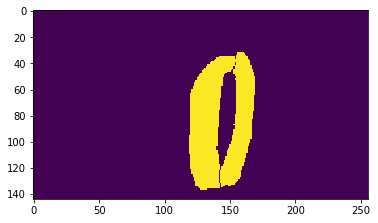

[0 2]


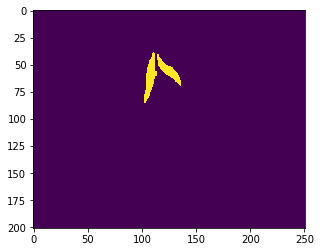

[0 2]


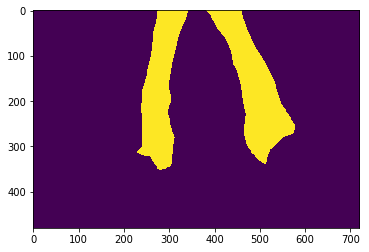

[0 1 2]


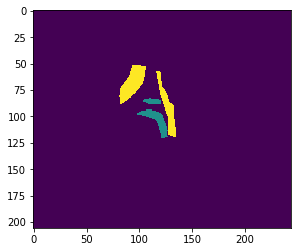

[0 2]


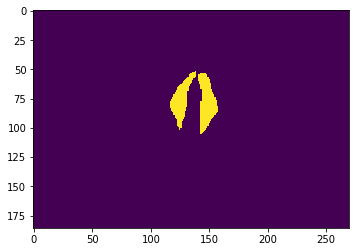

[0 1 2]


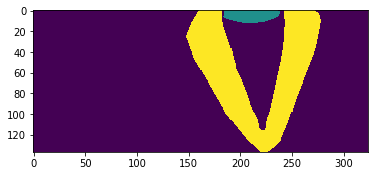

[0 2]


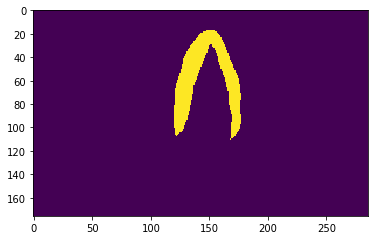

[0 2]


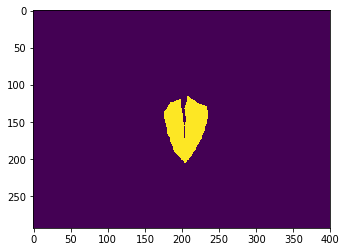

[0 1 2]


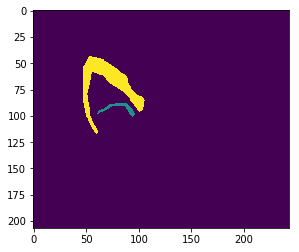

[0 1 2]


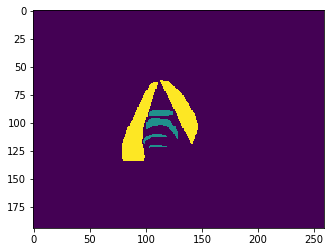

[0 2]


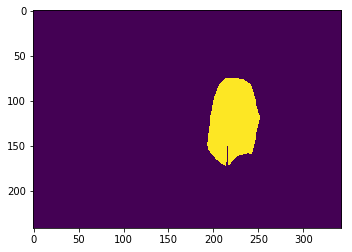

[0 1 2]


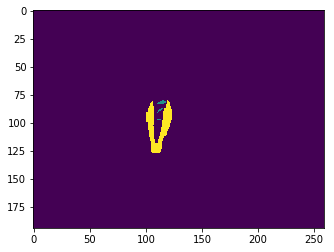

[0 2]


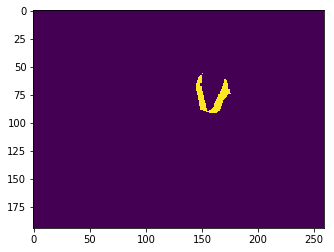

[0 1 2]


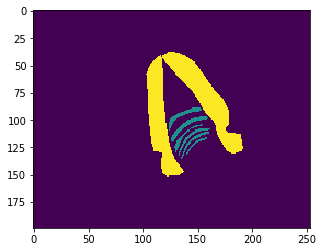

[0 1 2]


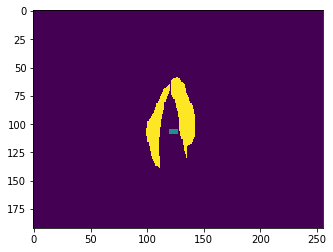

[0 2]


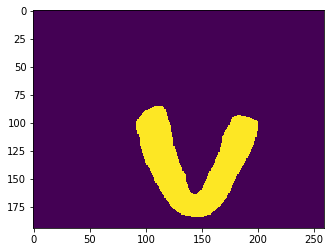

[0 2]


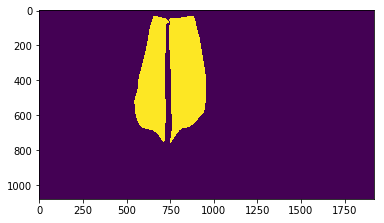

[0 2]


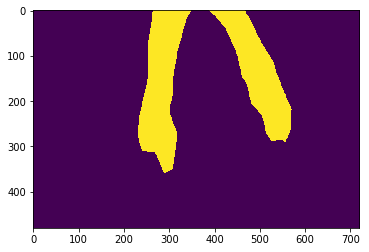

[0 1 2]


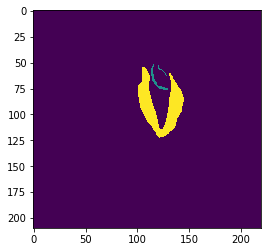

[0 2]


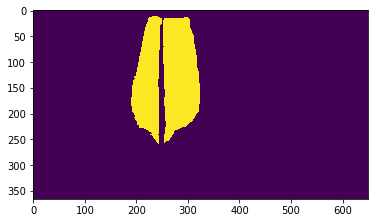

[0 1]


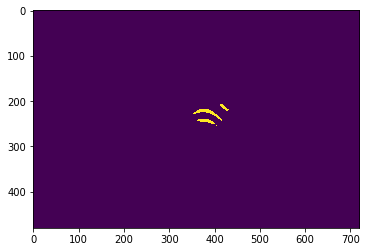

[0 1 3]


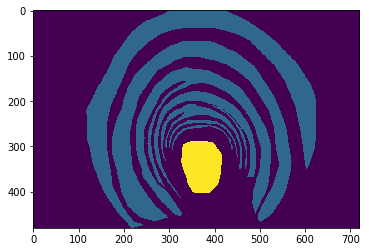

[0 2]


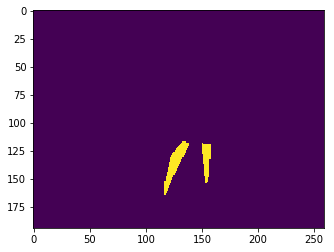

[0 1 2]


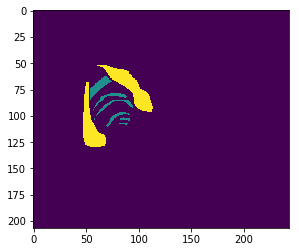

[0 2]


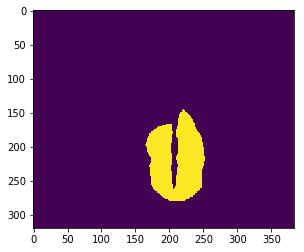

[0 2]


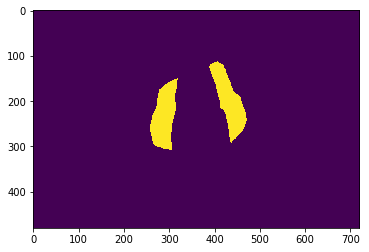

[0 2]


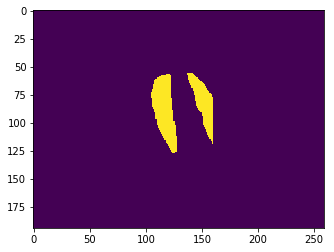

[0 2]


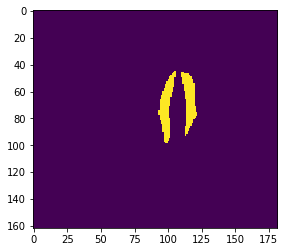

[0 1 2]


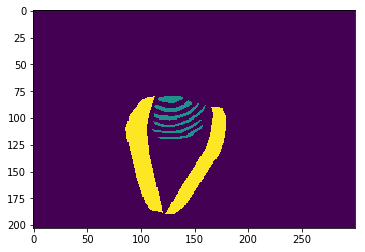

[0 1 3]


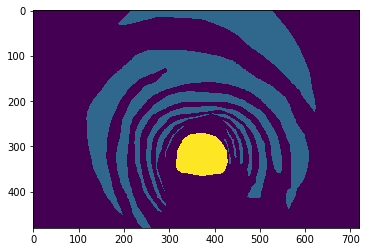

[0 2]


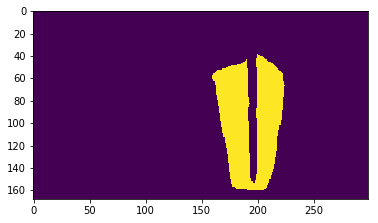

[0 2]


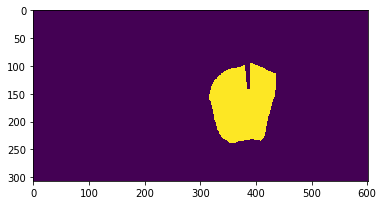

[0 2]


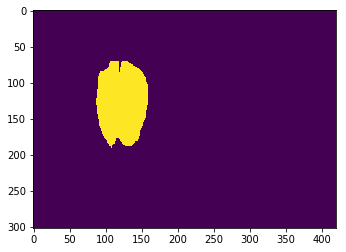

[0 2]


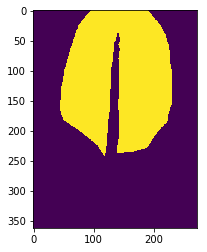

[0 2]


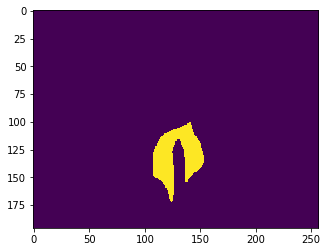

[0 1 2]


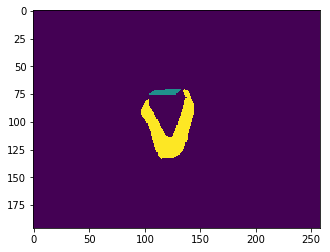

[0 2]


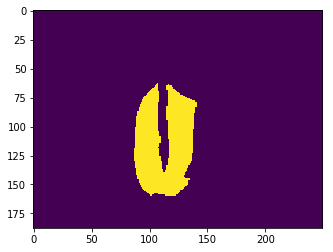

[0 1 2]


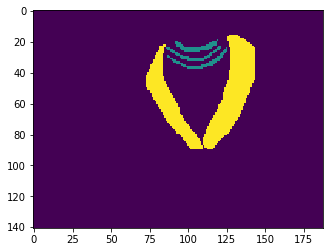

[0 1 3]


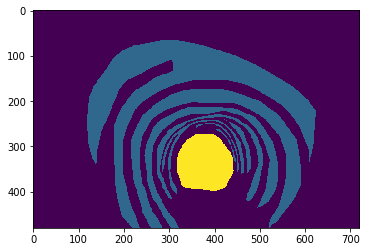

[0 1 3]


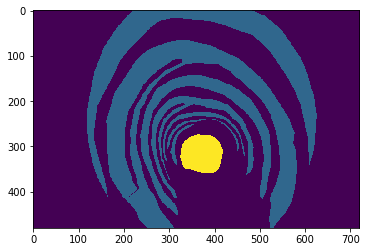

[0 2]


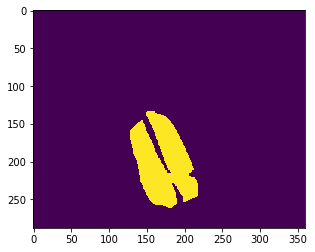

[0 2]


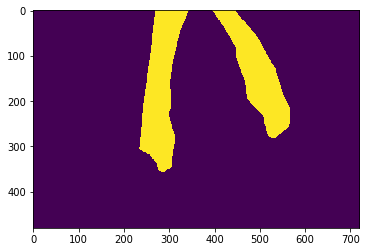

[0 1 2]


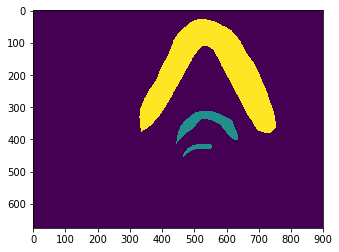

[0 2]


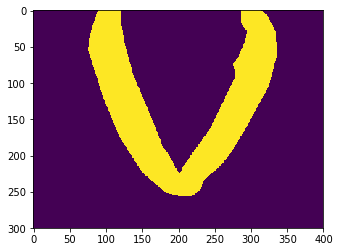

[0 2]


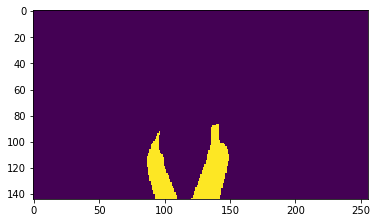

[0 1 2]


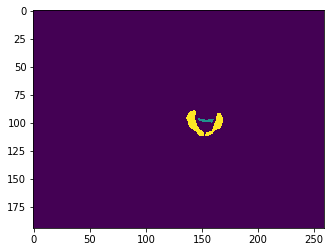

[0 1 2]


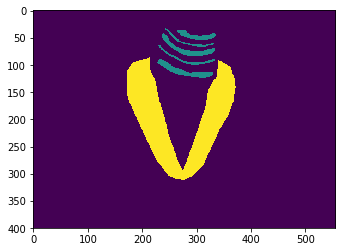

[0 2]


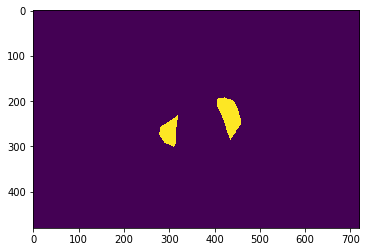

[0 1 2]


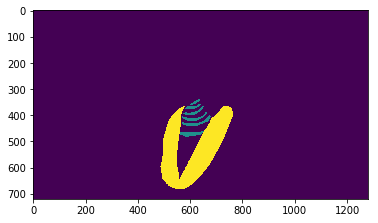

[0 1 2]


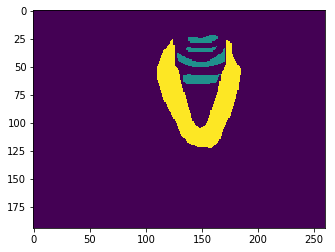

[0 2]


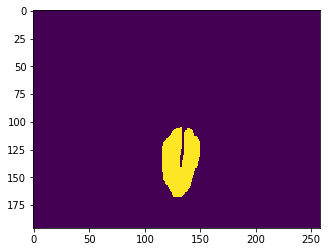

[0 2]


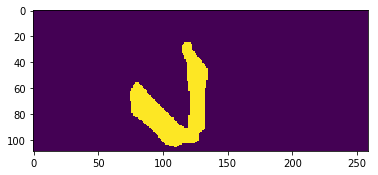

[0 1 2]


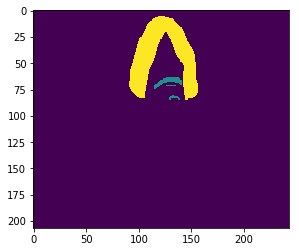

[0 1 2]


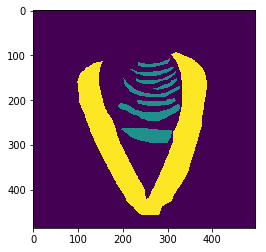

[0 2]


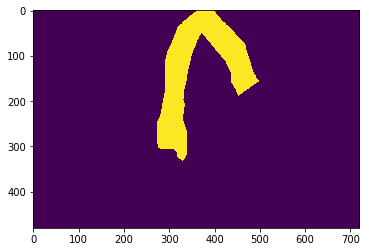

[0 2]


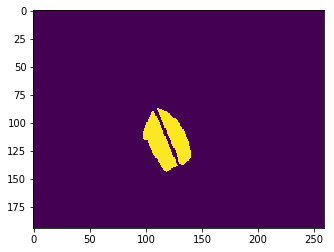

[0 2]


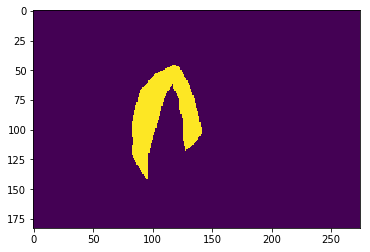

[0 2]


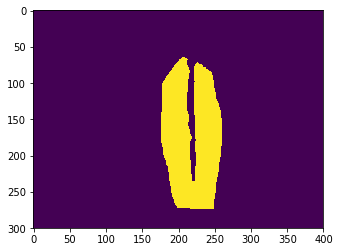

[0 1 2]


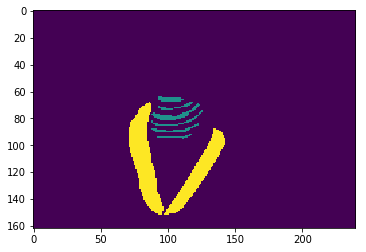

[0 1 2]


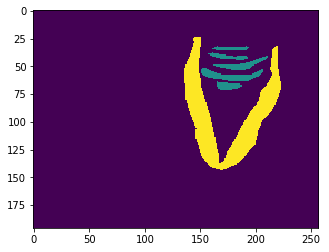

[0 1 2]


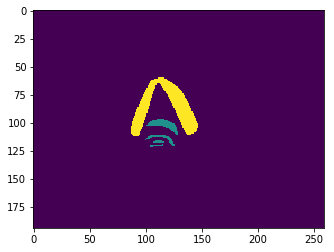

[0 2]


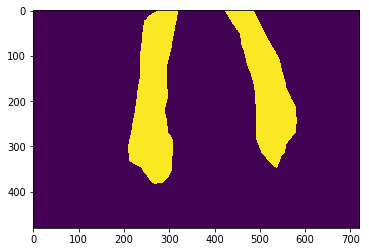

[0 2]


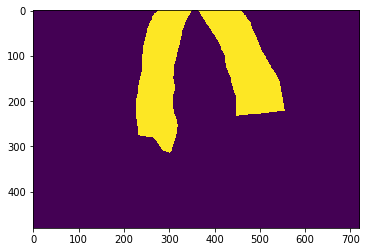

[0 2]


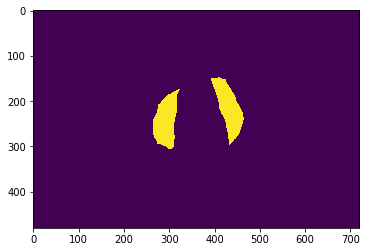

[0 1 2]


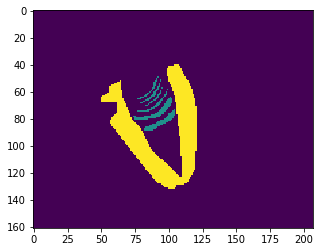

[0 2]


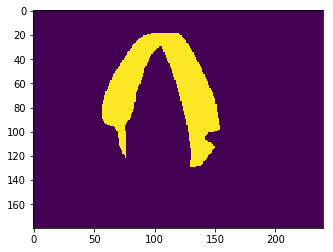

[0 1 2]


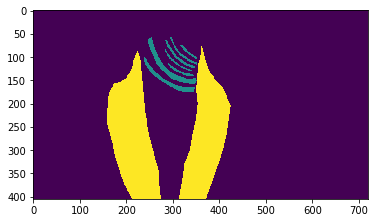

[0 2]


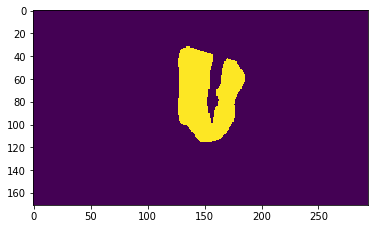

[0 2]


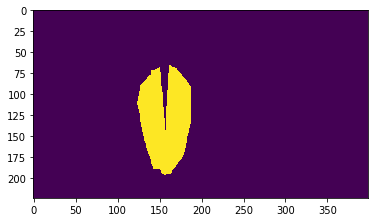

[0 1 2]


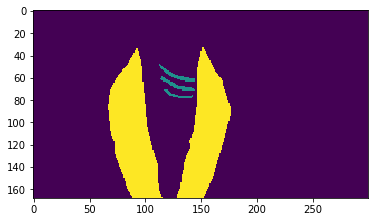

[0 2]


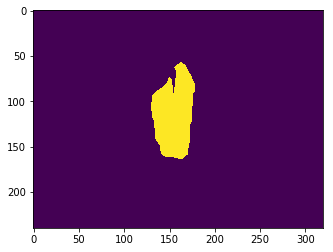

[0 1 2]


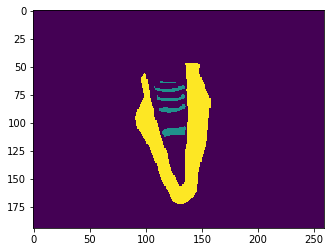

[0 1 2]


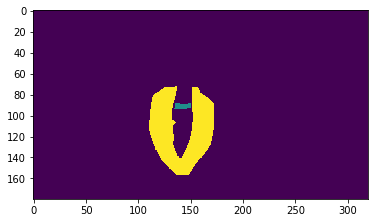

[0 2]


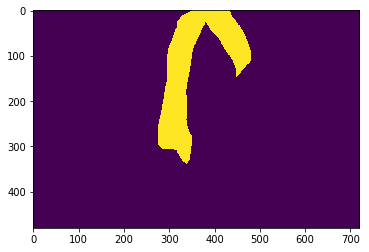

[0 2]


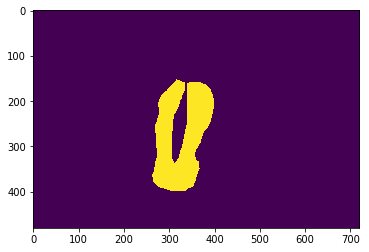

[0 2]


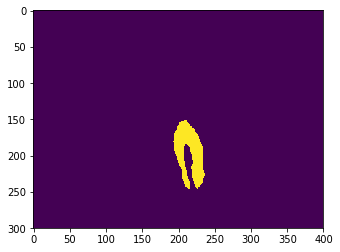

[0 2]


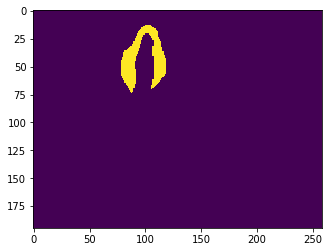

[0 1]


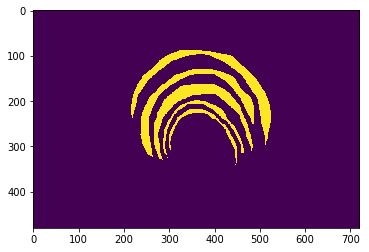

[0 1 2]


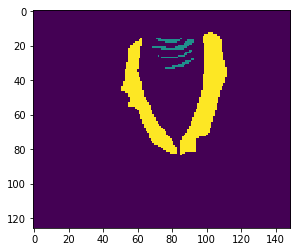

[0 1 2]


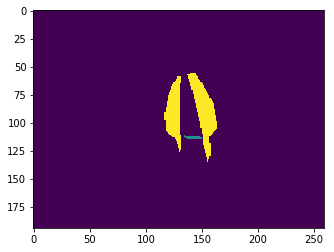

[0 2]


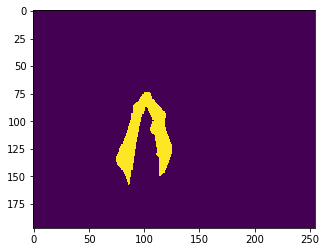

[0 2]


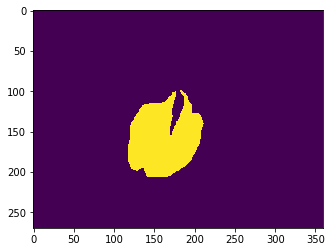

[0 2]


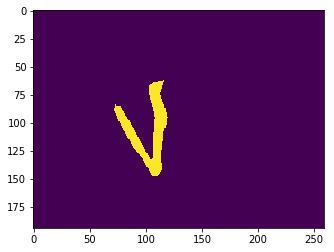

[0 1 2]


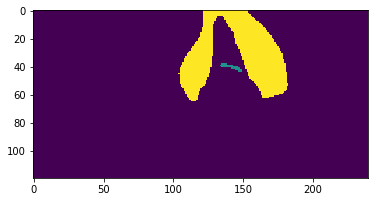

[0 2]


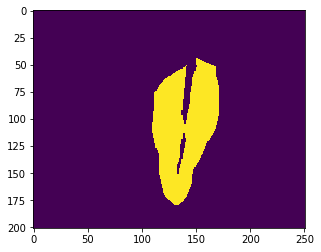

[0 1 2]


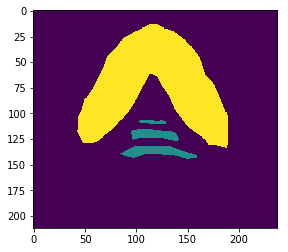

[0 1 2]


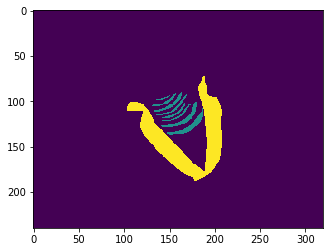

[0 1 2]


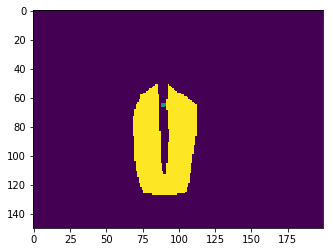

[0 1 2]


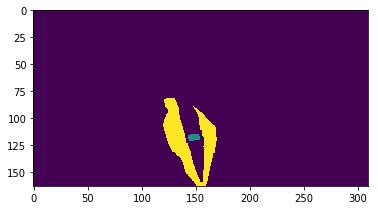

[0 2]


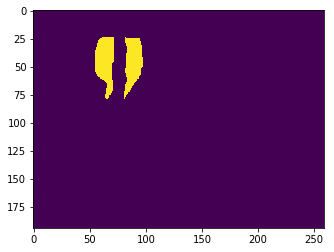

[0 2]


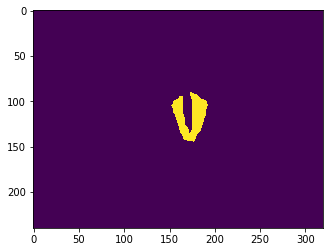

[0 1 2]


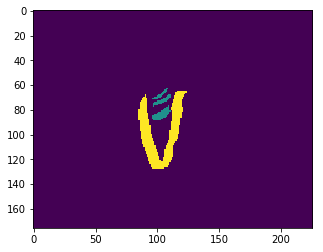

[0 1 2]


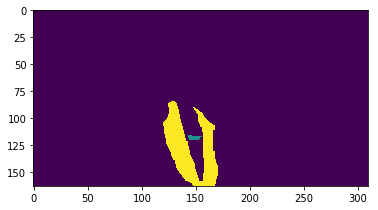

[0 1 2]


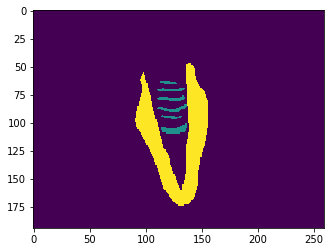

[0 2]


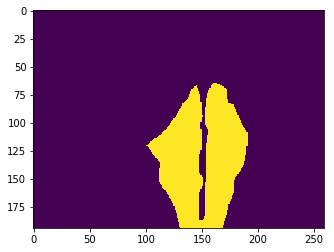

[0 1 2]


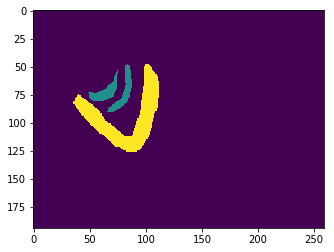

[0 1 2]


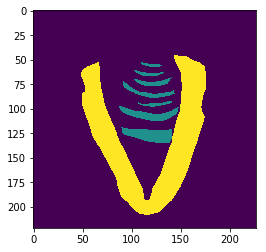

[0 1 2]


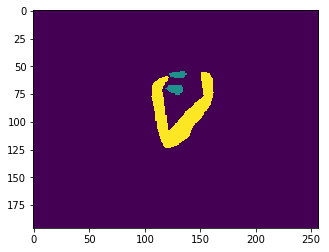

[0 1 2]


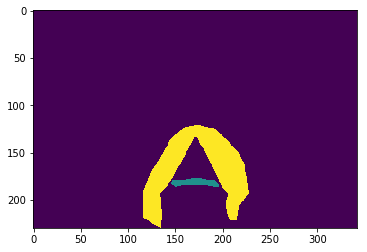

[0 2]


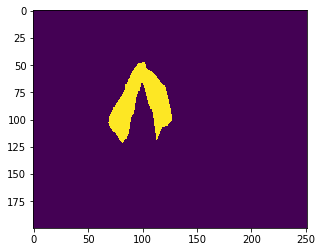

[0 1 3]


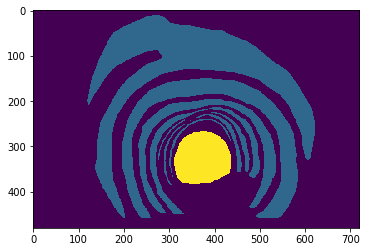

[0 2]


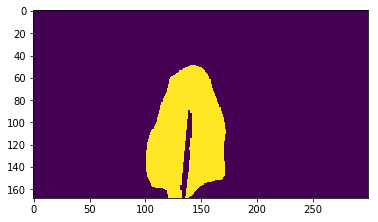

[0 2]


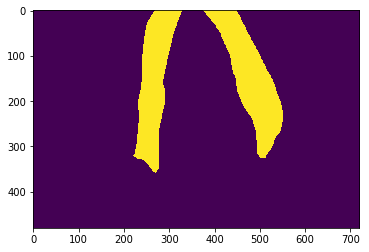

[0 2]


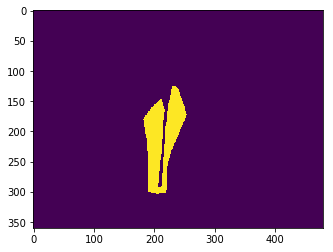

[0 1 2]


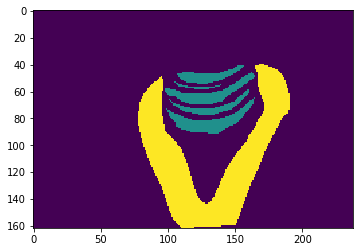

[0 1 2]


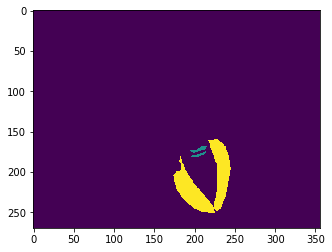

[0 2]


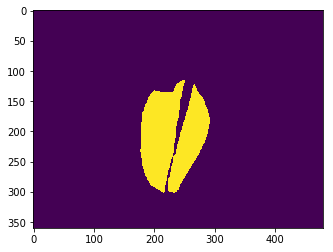

[0 2]


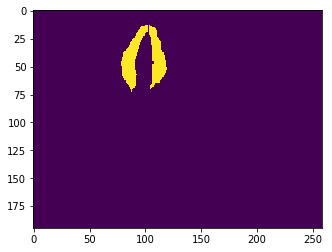

[0 1 2]


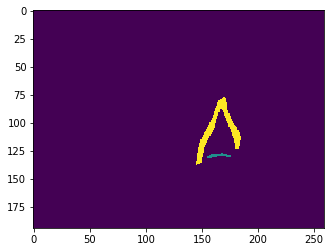

[0 1 3]


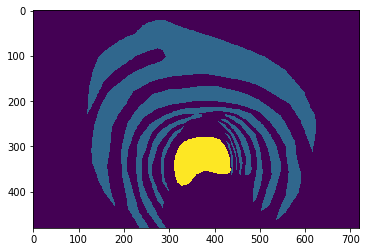

[0 2]


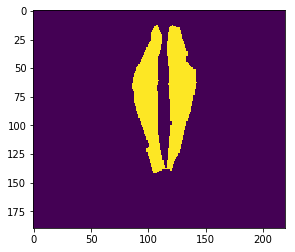

[0 1 2]


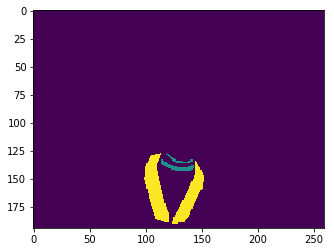

[0 1 2]


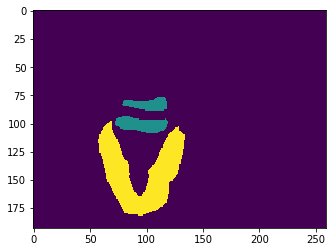

[0 1 2]


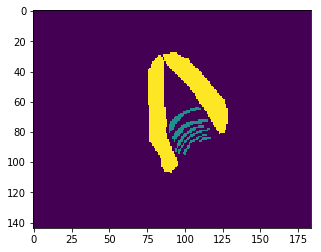

[0 2]


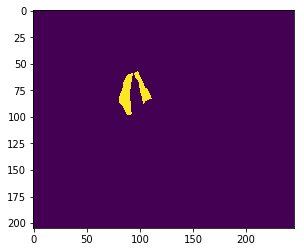

[0 1 2]


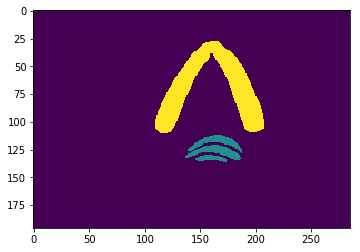

[0 2]


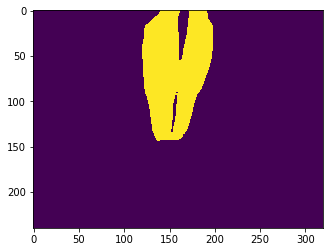

[0 2]


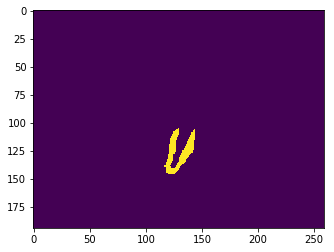

[0 2]


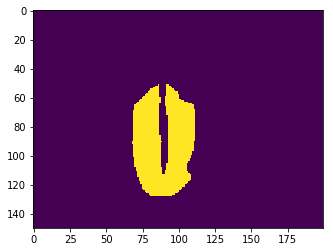

[0 2]


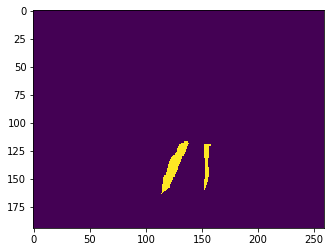

[0 2]


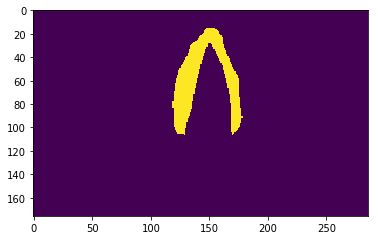

[0 1 2]


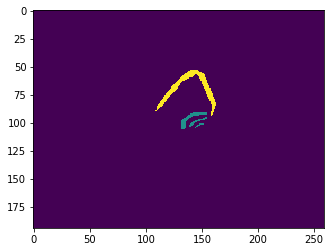

[0 1 2]


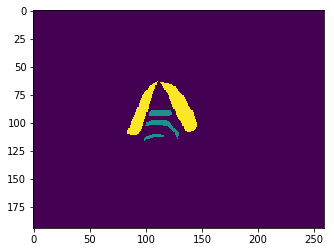

In [86]:
from fastai.vision import Image
import PIL

for img in get_image_files(path_lbl):
    im = cv2.imread(str(img), cv2.IMREAD_GRAYSCALE)
    print(np.unique(im))
#     im = Image(im)
    plt.imshow(im)
    plt.show()

# Merge folders

In [5]:
path = Path('/storage/vocal_cords_and_rings_data/data/')
path_1 = path/'classifier'
path_2 = path/'classifier_1'

imgs2 = get_image_files(path_2/'1')
imgs2 = imgs2 + get_image_files(path_2/'2')

In [6]:
imgs2

[PosixPath('/storage/vocal_cords_and_rings_data/data/classifier_1/1/img_4288.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/classifier_1/1/_img_120.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/classifier_1/1/img_5088.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/classifier_1/1/img_5216.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/classifier_1/1/img_5056.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/classifier_1/1/img_4156.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/classifier_1/1/img_4978.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/classifier_1/1/img_5002.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/classifier_1/1/_img_12.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/classifier_1/1/img_4300.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/classifier_1/1/_img_34.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/classifier_1/1/_img_56.pn

In [10]:
for img in imgs2:
    im = Image.open(img)
    name = str(path_1)+'/'+str(img).split('/')[-2]+'/_'+str(img).split('/')[-1]
    print(name)
    im.save(name)

/storage/vocal_cords_and_rings_data/data/classifier/1/_img_4288.png
/storage/vocal_cords_and_rings_data/data/classifier/1/__img_120.png
/storage/vocal_cords_and_rings_data/data/classifier/1/_img_5088.png
/storage/vocal_cords_and_rings_data/data/classifier/1/_img_5216.png
/storage/vocal_cords_and_rings_data/data/classifier/1/_img_5056.png
/storage/vocal_cords_and_rings_data/data/classifier/1/_img_4156.png
/storage/vocal_cords_and_rings_data/data/classifier/1/_img_4978.png
/storage/vocal_cords_and_rings_data/data/classifier/1/_img_5002.png
/storage/vocal_cords_and_rings_data/data/classifier/1/__img_12.png
/storage/vocal_cords_and_rings_data/data/classifier/1/_img_4300.png
/storage/vocal_cords_and_rings_data/data/classifier/1/__img_34.png
/storage/vocal_cords_and_rings_data/data/classifier/1/__img_56.png
/storage/vocal_cords_and_rings_data/data/classifier/1/_img_4220.png
/storage/vocal_cords_and_rings_data/data/classifier/1/_img_5184.png
/storage/vocal_cords_and_rings_data/data/classifier